In [1]:
# module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas scipy


In [2]:
# Read CSV file into a DataFrame
df = pd.read_csv(r"cotation_final_nchalah.csv")

# Display the DataFrame
print(df)

        Unnamed: 0        date          CODE             Name  open  close  \
0                0  2008-01-02        725001            ADWYA  3.30   3.39   
1                1  2008-01-03        725001            ADWYA  3.38   3.37   
2                2  2008-01-04        725001            ADWYA  3.35   3.36   
3                3  2008-01-07        725001            ADWYA  3.34   3.35   
4                4  2008-01-10        725001            ADWYA  3.34   3.35   
...            ...         ...           ...              ...   ...    ...   
294066      294066  2023-12-25  TN0007200017  WIFACK INT BANK  8.54   8.54   
294067      294067  2023-12-26  TN0007200017  WIFACK INT BANK  8.54   8.60   
294068      294068  2023-12-27  TN0007200017  WIFACK INT BANK  8.60   8.60   
294069      294069  2023-12-28  TN0007200017  WIFACK INT BANK  8.60   8.70   
294070      294070  2023-12-29  TN0007200017  WIFACK INT BANK  8.70   8.70   

         low  high  volume  NB_TRANSACTION  CAPITAUX IND_RES  


In [3]:
# df = pd.DataFrame(data)

# Convert 'SEANCE' to datetime if not already done
df['date'] = pd.to_datetime(df['date'])

In [4]:
df = df.drop(columns=['Unnamed: 0'])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294071 entries, 0 to 294070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              294069 non-null  datetime64[ns]
 1   CODE              294071 non-null  object        
 2   Name              294071 non-null  object        
 3   open              294071 non-null  float64       
 4   close             294071 non-null  float64       
 5   low               294071 non-null  float64       
 6   high              294071 non-null  float64       
 7   volume            294071 non-null  int64         
 8   NB_TRANSACTION    294071 non-null  int64         
 9   CAPITAUX IND_RES  294071 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 22.4+ MB


In [6]:
df["Name"].unique()

array(['ADWYA', 'AETECH', 'AIR LIQUIDE TSIE', 'ALKIMIA', 'AMEN BANK',
       'AMS', 'ARTES', 'ASS MULTI ITTIHAD', 'ASSAD', 'ASSUR MAGHREBIA',
       'ASSURANCES SALIM', 'ASTREE', 'ATB', 'ATELIER MEUBLE INT', 'ATL',
       'ATTIJARI', 'ATTIJARI LEASING', 'Autres Lignes', 'BEST LEASE',
       'BH', 'BH ASSURANCE', 'BH LEASING', 'BIAT', 'BNA', 'BT',
       'BTE (ADP)', 'CARTHAGE CEMENT', 'CELLCOM', 'CEREALIS', 'CIL',
       'CIMENTS DE BIZERTE', 'CITY CARS', 'DELICE HOLDING', 'EL MAZRAA',
       'EL WIFACK LEASING', 'ELBEN INDUSTRIE', 'ELECTROSTAR',
       'ENNAKL AUTOMOBILES', 'ESSOUKNA', 'EUROCYCLES', 'GENERAL LEASING',
       'GIFFILITER', 'HANNIBAL LEASE', 'HEXABYTE', 'ICF',
       'KARTHAGO AIRLINES', 'LA CARTE (CI)', 'LAND OR', 'MAGASIN GENERAL',
       'MAGHREB INTERN PUB', 'MIP', 'MODERN LEASING', 'MONOPRIX', 'MPBS',
       'NEW BODY LINE', 'OFFICEPLAST', 'ONE TECH HOLDING',
       'PALM BEACH (AA)', 'PALM BEACH (ADP)', 'PLAC. TSIE-SICAF',
       'POULINA GP HOLDING', 'SAH', 'SALI

In [7]:
# Selecting only the specified columns
new_df = df[['date', 'Name','open','close','low','high']]

# Check the first few rows to confirm the new DataFrame has the correct columns
print(new_df.head())


        date   Name  open  close   low  high
0 2008-01-02  ADWYA  3.30   3.39  3.39  3.39
1 2008-01-03  ADWYA  3.38   3.37  3.37  3.37
2 2008-01-04  ADWYA  3.35   3.36  3.36  3.36
3 2008-01-07  ADWYA  3.34   3.35  3.35  3.35
4 2008-01-10  ADWYA  3.34   3.35  3.35  3.35


In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294071 entries, 0 to 294070
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    294069 non-null  datetime64[ns]
 1   Name    294071 non-null  object        
 2   open    294071 non-null  float64       
 3   close   294071 non-null  float64       
 4   low     294071 non-null  float64       
 5   high    294071 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 13.5+ MB


In [9]:
# Set the window size for the moving average

# Calculate the moving average for each 'VALEUR'
new_df['Moving_Average_5'] = new_df.groupby('Name')['close'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
new_df['Moving_Average_10'] = new_df.groupby('Name')['close'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
new_df['Moving_Average_20'] = new_df.groupby('Name')['close'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
# Display the DataFrame to verify
print(new_df.head())

        date   Name  open  close   low  high  Moving_Average_5  \
0 2008-01-02  ADWYA  3.30   3.39  3.39  3.39          3.390000   
1 2008-01-03  ADWYA  3.38   3.37  3.37  3.37          3.380000   
2 2008-01-04  ADWYA  3.35   3.36  3.36  3.36          3.373333   
3 2008-01-07  ADWYA  3.34   3.35  3.35  3.35          3.367500   
4 2008-01-10  ADWYA  3.34   3.35  3.35  3.35          3.364000   

   Moving_Average_10  Moving_Average_20  
0           3.390000           3.390000  
1           3.380000           3.380000  
2           3.373333           3.373333  
3           3.367500           3.367500  
4           3.364000           3.364000  


<ipython-input-9-bdcd5b0487f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Moving_Average_5'] = new_df.groupby('Name')['close'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
<ipython-input-9-bdcd5b0487f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Moving_Average_10'] = new_df.groupby('Name')['close'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())
<ipython-input-9-bdcd5b0487f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294071 entries, 0 to 294070
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               294069 non-null  datetime64[ns]
 1   Name               294071 non-null  object        
 2   open               294071 non-null  float64       
 3   close              294071 non-null  float64       
 4   low                294071 non-null  float64       
 5   high               294071 non-null  float64       
 6   Moving_Average_5   294071 non-null  float64       
 7   Moving_Average_10  294071 non-null  float64       
 8   Moving_Average_20  294071 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 20.2+ MB


In [11]:
import plotly.graph_objs as go
import pandas as pd

# Filter the DataFrame for the company 'SFBT'
sfbt_data = new_df[new_df['Name'] == 'SFBT']

# Ensure the SEANCE column is in datetime format for proper plotting
sfbt_data['date'] = pd.to_datetime(sfbt_data['date'])

# Create a trace for the closing values of 'SFBT'
cloture_trace = go.Scatter(
    x=sfbt_data['date'],
    y=sfbt_data['close'],
    mode='lines',
    name='Closing Value',
)

# Create a trace for the 5-day moving average of 'SFBT'
ma_5_trace = go.Scatter(
    x=sfbt_data['date'],
    y=sfbt_data['Moving_Average_5'],
    mode='lines',
    name='5-day Moving Average'
)

# Combine the traces into a list
data = [cloture_trace, ma_5_trace]

# Define layout options
layout = go.Layout(
    title='5-day Moving Average vs Closing Value for SFBT',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value'),
    hovermode='closest'
)

# Create the figure with data and layout
fig = go.Figure(data=data, layout=layout,)

# Show the figure
fig.show()


<ipython-input-11-428450d047fc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sfbt_data['date'] = pd.to_datetime(sfbt_data['date'])


In [12]:
import plotly.graph_objs as go
import pandas as pd

# Filter the DataFrame for the company 'SFBT'
sfbt_data = new_df[new_df['Name'] == 'BIAT']

# Ensure the SEANCE column is in datetime format for proper plotting
sfbt_data['date'] = pd.to_datetime(sfbt_data['date'])

# Create a trace for the closing values of 'SFBT'
cloture_trace = go.Scatter(
    x=sfbt_data['date'],
    y=sfbt_data['close'],
    mode='lines',
    name='Closing Value',
)

# Create a trace for the 10-day moving average of 'BIAT'
ma_5_trace = go.Scatter(
    x=sfbt_data['date'],
    y=sfbt_data['Moving_Average_10'],
    mode='lines',
    name='10-day Moving Average'
)

# Combine the traces into a list
data = [cloture_trace, ma_5_trace]

# Define layout options
layout = go.Layout(
    title='10-day Moving Average vs Closing Value for BIAT',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value'),
    hovermode='closest'
)

# Create the figure with data and layout
fig = go.Figure(data=data, layout=layout,)

# Show the figure
fig.show()


<ipython-input-12-51e39c293072>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
import plotly.graph_objs as go
import pandas as pd

# Filter the DataFrame for the company 'ADWYA'
sfbt_data = new_df[new_df['Name'] == 'ADWYA']

# Ensure the SEANCE column is in datetime format for proper plotting
sfbt_data['date'] = pd.to_datetime(sfbt_data['date'])

# Create a trace for the closing values of 'ADWYA'
cloture_trace = go.Scatter(
    x=sfbt_data['date'],
    y=sfbt_data['close'],
    mode='lines',
    name='Closing Value',
)

# Create a trace for the 5-day moving average of 'ADWYA'
ma_5_trace = go.Scatter(
    x=sfbt_data['date'],
    y=sfbt_data['Moving_Average_20'],
    mode='lines',
    name='20-day Moving Average'
)

# Combine the traces into a list
data = [cloture_trace, ma_5_trace]

# Define layout options
layout = go.Layout(
    title='20-day Moving Average vs Closing Value for ADWYA',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value'),
    hovermode='closest'
)

# Create the figure with data and layout
fig = go.Figure(data=data, layout=layout,)

# Show the figure
fig.show()


<ipython-input-13-53c9150af067>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294071 entries, 0 to 294070
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               294069 non-null  datetime64[ns]
 1   Name               294071 non-null  object        
 2   open               294071 non-null  float64       
 3   close              294071 non-null  float64       
 4   low                294071 non-null  float64       
 5   high               294071 non-null  float64       
 6   Moving_Average_5   294071 non-null  float64       
 7   Moving_Average_10  294071 non-null  float64       
 8   Moving_Average_20  294071 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 20.2+ MB


In [15]:
import pandas as pd
from scipy.stats import kurtosis, skew



# Group by 'VALEUR' and calculate each statistic
stats = new_df.groupby('Name')['close'].agg(
    Volatility='std',  # Standard deviation for volatility
    Kurtosis=lambda x: kurtosis(x, fisher=True),  # Kurtosis, Fisher’s definition (subtracting 3)
    Skewness=skew,  # Skewness
    Mean='mean',  # Mean
    Median='median',  # Median
    First_Quartile=lambda x: x.quantile(0.25),  # First quartile (Q1)
    Third_Quartile=lambda x: x.quantile(0.75)   # Third quartile (Q3)



)

print(stats)


                  Volatility  Kurtosis  Skewness        Mean      Median  \
Name                                                                       
ADWYA               1.701411 -0.587277 -0.247423    6.262836    6.356209   
AETECH              1.767264  2.291090  1.867794    1.489916    0.760000   
AIR LIQUIDE TSIE  110.148257 -0.779873  0.617561  191.897996  170.400000   
ALKIMIA             9.167465  0.162151  0.703701   37.386879   35.942500   
AMEN BANK          16.084700  1.434197  1.637668   34.646866   28.000000   
...                      ...       ...       ...         ...         ...   
UBCI               11.243359  1.245972  1.245052   31.621698   26.000000   
UIB                 4.221152  0.783128  0.873217   18.606669   17.800000   
UNIMED              1.326803  0.241314  0.566695    8.752331    8.800000   
VALEUR              0.113137 -2.000000  0.000000    7.240000    7.240000   
WIFACK INT BANK     0.588153  1.339342  0.486663    6.864136    6.950000   

           

In [16]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, ADWYA to WIFACK INT BANK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Volatility      101 non-null    float64
 1   Kurtosis        101 non-null    float64
 2   Skewness        101 non-null    float64
 3   Mean            102 non-null    float64
 4   Median          102 non-null    float64
 5   First_Quartile  102 non-null    float64
 6   Third_Quartile  102 non-null    float64
dtypes: float64(7)
memory usage: 6.4+ KB


In [17]:
stats.isna().sum()

Volatility        1
Kurtosis          1
Skewness          1
Mean              0
Median            0
First_Quartile    0
Third_Quartile    0
dtype: int64

In [18]:
stats=stats.dropna()

In [19]:
compartiments = {
    "SFBT": "A",
    "ATTIJARI": "A",
    "BIAT": "A",
    "BH": "A",
    "BT": "A",
    "STB": "A",
    "BNA": "A",
    "AMEN BANK": "A",
    "ATB": "A",
    "UIB": "A",
    "POULINA GP HOLDING": "A",
    "SOTUVER": "A",
    "TPR": "A",
    "ARTES": "A",
    "CARTHAGE CEMENT": "A",
    "ENNAKEL AUTOMOBILE": "A",
    "ONE TECH HOLDING": "A",
    "CITY CARS": "A",
    "SAH": "A",
    "DELICE HOLDING": "A",
    "UNIMED": "A",
    "UBCI": "A",
    "STAR": "A",
    "ASTREE": "A",
    "ASSUR MAGHREBIA": "A",
    "ICF": "B",
    "ATL": "B",
    "SOTETEL": "B",
    "SOTUMAG": "B",
    "SIAME": "B",
    "ATTIJARI LEASING": "B",
    "SOTRAPIL": "B",
    "SOMOCER": "B",
    "TELNET HOLDING": "B",
    "LAND OR": "B",
    "NEW BODY LINE": "B",
    "EURO-CYCLES": "B",
    "MPBS": "B",
    "SOTIPAPIER": "B",
    "ATELIER MEUBLE INT": "B",
    "SMART TUNISIE": "B",
    "STA": "B",
    "MONOPRIX": "B",
    "BTE": "B",
    "TUNISIE LEASING": "B",
    "AIR LIQUID TSIE": "B",
    "PLAC. TSIE-SICAF": "B",
    "SIMPAR": "B",
    "TUNINVEST-SICAR": "B",
    "CIL": "B",
    "STIP": "B",
    "MAGASIN GENERAL": "B",
    "BH ASSURANCE": "B",
    "BH LEASING": "B",
    "SITS": "B",
    "ESSOUKNA": "B",
    "HANIBAL LEASE": "B",
    "CIMENTS DE BIZERTE": "B",
    "TUNIS RE": "B",
    "BEST LEASE": "B",
    "SOTEMAIL": "B",
    "OFFICEPLAST": "B",
    "TUNISAIR": "S",
    "ALKIMIA": "S",
    "ELECTROSTAR": "S",
    "SIPHAT": "S",
    "GIFFILTER": "S",
    "ASSAD": "S",
    "SERVICOM": "S",
    "AETECH": "S",
    "CELLCOM": "S",
    "TAWASOL GP HOLDING": "S",
    "MAGHREB INTERN PUB": "S",
    "UADH": "S",
    "SANIMED": "S"
}


In [20]:
# Reset index to turn the 'Name' index into a column
stats = stats.reset_index()
stats.head()  # Display the first few rows to confirm


,Name,Volatility,Kurtosis,Skewness,Mean,Median,First_Quartile,Third_Quartile
0,ADWYA,1.701411,-0.587277,-0.247423,6.262836,6.356209,5.00,7.677500
1,AETECH,1.767264,2.291090,1.867794,1.489916,0.760000,0.43,1.627900
2,AIR LIQUIDE TSIE,110.148257,-0.779873,0.617561,191.897996,170.400000,89.50,290.000000
3,ALKIMIA,9.167465,0.162151,0.703701,37.386879,35.942500,30.00,42.994464
4,AMEN BANK,16.084700,1.434197,1.637668,34.646866,28.000000,24.49,35.402500


In [21]:
def segment(index):
  if(index in compartiments.keys()):
    return compartiments[index]
  else:
     return 'none'

In [22]:
stats['Compartiment']=stats['Name'].apply(segment)

In [23]:
stats_for_importance=stats[stats['Compartiment']!='none']
stats_for_importance

,Name,Volatility,Kurtosis,Skewness,Mean,Median,First_Quartile,Third_Quartile,Compartiment
1,AETECH,1.767264,2.291090,1.867794,1.489916,0.760000,0.430000,1.627900,S
3,ALKIMIA,9.167465,0.162151,0.703701,37.386879,35.942500,30.000000,42.994464,S
4,AMEN BANK,16.084700,1.434197,1.637668,34.646866,28.000000,24.490000,35.402500,A
6,ARTES,2.433232,-0.613961,0.563103,7.849687,7.200000,6.133850,9.600000,A
8,ASSAD,3.457094,-0.699672,-0.256303,7.266013,7.500000,4.800000,10.044096,S
...,...,...,...,...,...,...,...,...,...
93,TUNISIE LEASING,7.506902,-0.785214,0.352440,18.669100,18.738636,10.700000,23.800000,B
95,UADH,3.093050,6.856603,2.522137,2.473233,1.350000,0.520000,3.240000,S
96,UBCI,11.243359,1.245972,1.245052,31.621698,26.000000,23.000000,40.000000,A
97,UIB,4.221152,0.783128,0.873217,18.606669,17.800000,15.502326,21.700000,A


In [24]:
# Set 'Name' column as the index of the DataFrame
stats_for_importance = stats_for_importance.set_index('Name')
stats_for_importance.head()  # Display
# Set 'Name' column as the index of the DataFrame


,Volatility,Kurtosis,Skewness,Mean,Median,First_Quartile,Third_Quartile,Compartiment
Name,,,,,,,,
AETECH,1.767264,2.291090,1.867794,1.489916,0.7600,0.43000,1.627900,S
ALKIMIA,9.167465,0.162151,0.703701,37.386879,35.9425,30.00000,42.994464,S
AMEN BANK,16.084700,1.434197,1.637668,34.646866,28.0000,24.49000,35.402500,A
ARTES,2.433232,-0.613961,0.563103,7.849687,7.2000,6.13385,9.600000,A
ASSAD,3.457094,-0.699672,-0.256303,7.266013,7.5000,4.80000,10.044096,S


In [25]:
stats = stats.set_index('Name')

In [26]:
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Example target variable 'y' (make sure you have this column or create a target for your scenario)
y = pd.get_dummies(stats_for_importance['Compartiment'])

X = stats_for_importance.drop(columns=['Compartiment'])  # Use the rest of the columns as features


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

# Train the classification model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_ * 100
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, importances))

print("Feature importances:", feature_importance_dict)



Feature importances: {'Volatility': 12.348095941923315, 'Kurtosis': 13.460117106065288, 'Skewness': 12.252812546051118, 'Mean': 11.603783600862299, 'Median': 17.33361265171526, 'First_Quartile': 13.76242662379616, 'Third_Quartile': 19.239151529586554}


In [27]:
stats=stats.drop(columns="Compartiment")

In [28]:
stats

,Volatility,Kurtosis,Skewness,Mean,Median,First_Quartile,Third_Quartile
Name,,,,,,,
ADWYA,1.701411,-0.587277,-0.247423,6.262836,6.356209,5.000000,7.677500
AETECH,1.767264,2.291090,1.867794,1.489916,0.760000,0.430000,1.627900
AIR LIQUIDE TSIE,110.148257,-0.779873,0.617561,191.897996,170.400000,89.500000,290.000000
ALKIMIA,9.167465,0.162151,0.703701,37.386879,35.942500,30.000000,42.994464
AMEN BANK,16.084700,1.434197,1.637668,34.646866,28.000000,24.490000,35.402500
...,...,...,...,...,...,...,...
UBCI,11.243359,1.245972,1.245052,31.621698,26.000000,23.000000,40.000000
UIB,4.221152,0.783128,0.873217,18.606669,17.800000,15.502326,21.700000
UNIMED,1.326803,0.241314,0.566695,8.752331,8.800000,7.470000,9.870000


In [29]:
feature_importance_dict.values()

dict_values([12.348095941923315, 13.460117106065288, 12.252812546051118, 11.603783600862299, 17.33361265171526, 13.76242662379616, 19.239151529586554])

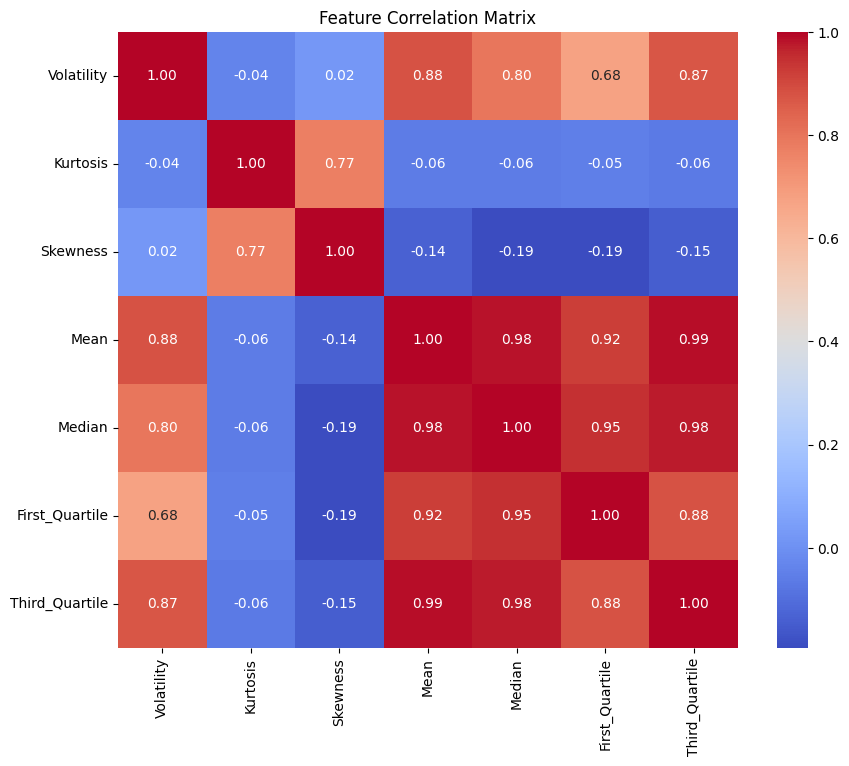

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = stats.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


**Conclusion: All features are important**

In [31]:
pip install scikit-learn


In [32]:
!pip install umap-learn


In [33]:
import umap
import matplotlib.pyplot as plt


In [34]:
import umap.umap_ as umap

# Define the UMAP reducer with the parameters you want
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
# Assuming 'stats' is your DataFrame and you're focusing on these columns
# Fit and transform with UMAP
embedding = umap_reducer.fit_transform(stats)



/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [35]:
from sklearn.cluster import KMeans


In [36]:
# Step 5: Clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(embedding)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



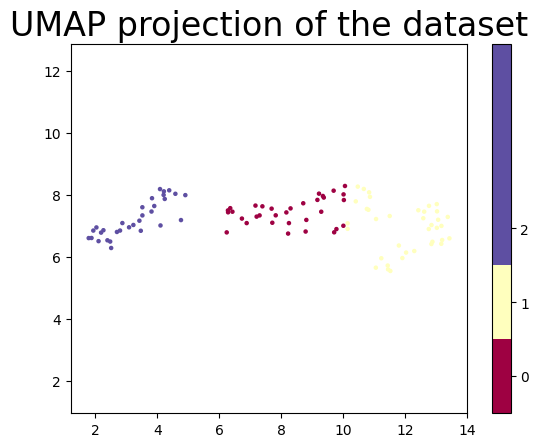

In [37]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(6)-0.5).set_ticks(np.arange(3))
plt.title('UMAP projection of the dataset', fontsize=24)
plt.show()


In [38]:
import plotly.express as px
import numpy as np

# Assuming 'embedding' contains your UMAP results and 'clusters' contains your cluster labels
# Replace 'embedding' and 'clusters' with your actual data variables

# Create a color map for your clusters
color_map = {0: 'blue', 1: 'red', 2: 'green'}

# Map your cluster labels to colors
colors = [color_map[label] for label in clusters]

fig = px.scatter(
    x=embedding[:, 0], y=embedding[:, 1],
    color=colors,
    title='UMAP projection followed by Kmeans clustering'
)

# Update layout to ensure the aspect ratio is equal
fig.update_traces(marker=dict(size=5))
fig.update_layout(
    xaxis_title='UMAP Component 1',
    yaxis_title='UMAP Component 2',
    xaxis=dict(scaleanchor='y', scaleratio=1),
    yaxis=dict(scaleanchor='x', scaleratio=1)
)

# Show the figure
fig.show()


DbScan


In [39]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Since UMAP scales data as part of its process, additional scaling may not be necessary, but be attentive to this based on your dataset characteristics
# Prepare DBSCAN with chosen parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on your specific needs

# Apply DBSCAN to the UMAP embedding
clusters = dbscan.fit_predict(embedding)


In [53]:
import plotly.express as px
import pandas as pd

# Assuming 'embedding' contains the UMAP results and 'clusters' contains the DBSCAN cluster assignments
# Convert the numpy arrays into a DataFrame for easier handling with Plotly
df_umap = pd.DataFrame(embedding, columns=['UMAP 1', 'UMAP 2'])
df_umap['Cluster'] = clusters

# Create a scatter plot using Plotly Express
fig = px.scatter(
    df_umap,
    x='UMAP 1',
    y='UMAP 2',
    color='Cluster',
    color_continuous_scale='Viridis',  # Using a similar color map to 'viridis' from matplotlib
    title='UMAP projection followed by DBSCAN clustering'
)

fig.update_traces(marker=dict(size=10, opacity=0.5))
fig.update_layout(
    xaxis_title='UMAP 1',
    yaxis_title='UMAP 2'
)

# Show the plot
fig.show()


t-sne

In [41]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [42]:
# Assuming 'stats' is your DataFrame and you have several numerical features you want to include in t-SNE

# Select numerical features for t-SNE
features = stats.select_dtypes(include=[np.number])

# Standardize the features to have mean = 0 and variance = 1
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [43]:
# Initialize t-SNE with desired parameters
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)

# Fit and transform the scaled data
tsne_results = tsne.fit_transform(features_scaled)

# Optionally, create a new DataFrame that includes the t-SNE dimensions and any other useful information (like clusters or categories)
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])


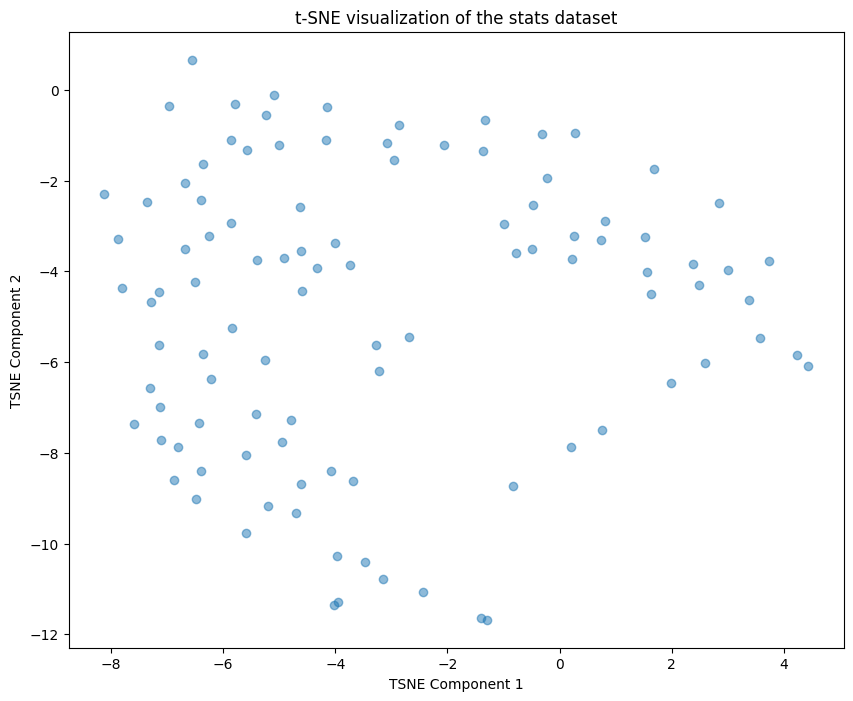

In [44]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], alpha=0.5)  # You can color by clusters or categories if available
plt.title('t-SNE visualization of the stats dataset')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()


In [45]:
from sklearn.cluster import KMeans

# Choose the number of clusters
k = 3  # Adjust this based on your analysis or criteria

# Initialize and fit K-means
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(tsne_df)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [46]:
import plotly.express as px
import pandas as pd

# Assuming tsne_results and clusters are defined
# Convert the numpy array to a DataFrame
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE Component 1', 'TSNE Component 2'])
df_tsne['Cluster'] = clusters  # Add the cluster assignments from K-means

# Define RGB colors for clusters, assuming there are three clusters: 0, 1, 2
colors = {0: 'rgb(255,0,0)',  # Red
          1: 'rgb(0,255,0)',  # Green
          2: 'rgb(0,0,255)'}  # Blue

# Map the clusters to colors
df_tsne['Color'] = df_tsne['Cluster'].map(colors)

# Create a scatter plot using Plotly Express with custom RGB colors
fig = px.scatter(
    df_tsne,
    x='TSNE Component 1',
    y='TSNE Component 2',
    color='Color',
    color_discrete_sequence=[colors[k] for k in sorted(colors.keys())],  # Ensure colors are used as given
    title='t-SNE followed by K-means clustering'
)

# Update layout for a better view
fig.update_layout(
    xaxis_title='TSNE Component 1',
    yaxis_title='TSNE Component 2',
    legend_title='Cluster',
    showlegend=False  # Hide the legend if not required
)

# Show the plot
fig.show()


PCA

In [47]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [48]:
# Assuming 'stats' is your DataFrame and it contains numerical features
features = stats.select_dtypes(include=[np.number])  # Extracting only numerical columns if necessary

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [49]:
# Initialize PCA, choosing to keep the first two principal components
pca = PCA(n_components=2)

# Fit PCA on the scaled data and transform it
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame containing the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])


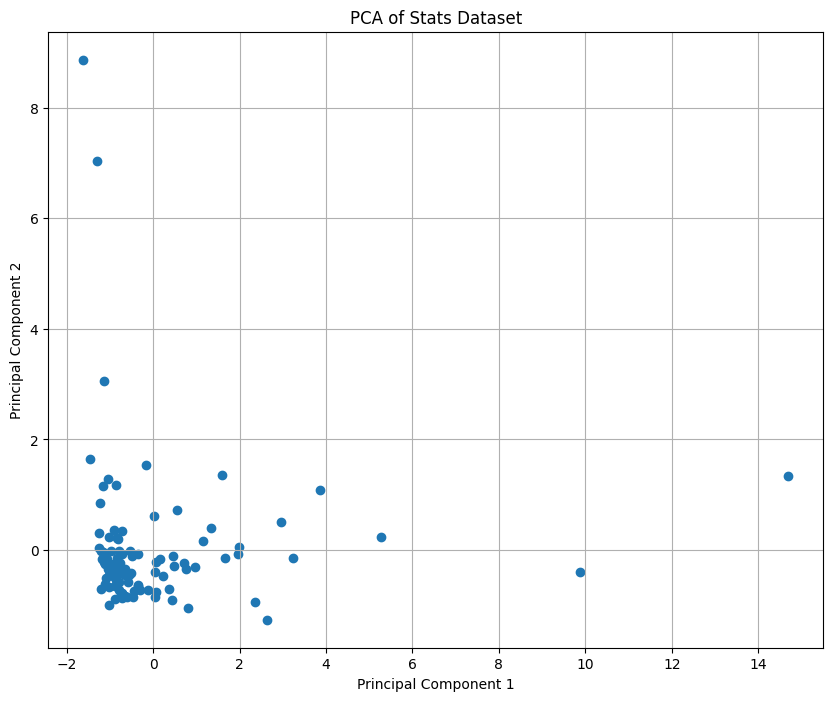

In [50]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.title('PCA of Stats Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [51]:
from sklearn.cluster import KMeans

# Choose the number of clusters
k = 3  # Adjust this based on your specific needs or domain knowledge

# Initialize and fit K-means
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Optionally, add the cluster labels back to the PCA DataFrame
pca_df['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [52]:
import plotly.express as px

# Assuming pca_df contains 'Principal Component 1', 'Principal Component 2', and 'Cluster' from PCA and K-means
# Define RGB colors for clusters
color_discrete_map = {0: 'rgb(255,0,0)',  # Red for cluster 0
                      1: 'rgb(0,255,0)',  # Green for cluster 1
                      2: 'rgb(0,0,255)'}  # Blue for cluster 2

fig = px.scatter(
    pca_df,
    x='Principal Component 1',
    y='Principal Component 2',
    color='Cluster',
    color_discrete_map=color_discrete_map,  # Apply custom RGB colors
    title='PCA followed by K-means clustering'
)

fig.update_traces(marker=dict(size=10, line=dict(width=2,
                                                  color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2'
)

# Show the plot
fig.show()


In [55]:
!pip install tensorflow

**Conclusion: UMAP FOLLOWED BY KMEANS CLUSTERING HAS THE BEST RESULTS**